#以面向对象的方式理解数学绘图库 Matplotlib
Understand Matplotlib In Object-Oriented Way  

###1.缘起  
网上有很多介绍 Matplotlib 的教程，多半是基于类似 matlab 的过程式函数调用，对于理解面向对象特性帮助不大。介绍 OO 思想很少的几篇文章虽精辟[注1]，却不能满足我想系统把握面向对象库类的需求，于是我打开了 matplotlib 的源码，来看看到底有什么类存在其中。

###2.理解 matplotlib
Matplotlib，顾名思义，mat 是 mathematics 的缩写，意为数学； plot 意为绘图， lib 是 library 的缩写，意为库或者类库， 合并起来就是“数学绘图库”。为了进一步理解他，打开'/Users/chengang/anaconda/lib/python2.7/site-packages/matplotlib/'，找到 Matplotlib 的初始化文件 \__init\__.py 并用编辑器打开[注2]。我们豁然看到的第一句话是：   

**This is an object-oriented plotting library.  
这是一个对象导向的绘图库。**

也就是说，本质上 matplotlib 是一个以面向对象思想组织起来的库，这里面有很多”对象“可以完成绘图的任务。那么他都有什么对象？对象有什么功能？对象之间是什么结构？让我们看看 \__init\__.py 源代码里包含的对象介绍。查看第 28~78 行：

Modules include:  
模块包括：

    :mod:`matplotlib.axes`
        defines the :class:`~matplotlib.axes.Axes` class.  Most pylab
        commands are wrappers for :class:`~matplotlib.axes.Axes`
        methods.  The axes module is the highest level of OO access to
        the library.
        定义 Axes 类。大部分 pylab 命令是对 Axes 类方法的包装。axes 模块是到本库的最高级的面向对象访问路径。（最高不是 Figure??）

    :mod:`matplotlib.figure`
        defines the :class:`~matplotlib.figure.Figure` class.
        定义 Figure 类。

    :mod:`matplotlib.artist`
        defines the :class:`~matplotlib.artist.Artist` base class for
        all classes that draw things.
        定义 Artist，所有绘制东西的类的基类。

    :mod:`matplotlib.lines`
        defines the :class:`~matplotlib.lines.Line2D` class for
        drawing lines and markers
        定义 Line2D 类，可以绘制线和记号。

    :mod:`matplotlib.patches`
        defines classes for drawing polygons
        定义类可以绘制多边形。

    :mod:`matplotlib.text`
        defines the :class:`~matplotlib.text.Text`,
        :class:`~matplotlib.text.TextWithDash`, and
        :class:`~matplotlib.text.Annotate` classes
        定义 Text, TextWithDash, Annotate 类。

    :mod:`matplotlib.image`
        defines the :class:`~matplotlib.image.AxesImage` and
        :class:`~matplotlib.image.FigureImage` classes
        定义 AxesImage, FigureImage 类。

    :mod:`matplotlib.collections`
        classes for efficient drawing of groups of lines or polygons
        此类可以高效的绘制成组的线或者多边形。

    :mod:`matplotlib.colors`
        classes for interpreting color specifications and for making
        colormaps
        此类可以解释颜色定义和制作颜色映射。

    :mod:`matplotlib.cm`
        colormaps and the :class:`~matplotlib.image.ScalarMappable`
        mixin class for providing color mapping functionality to other
        classes
        颜色映射和 ScalarMappable 是最小化的可以提供颜色映射功能到其他类的类。

    :mod:`matplotlib.ticker`
        classes for calculating tick mark locations and for formatting
        tick labels
        此类可以计算刻度线标签和格式化刻度线标签。

    :mod:`matplotlib.backends`
        a subpackage with modules for various gui libraries and output
        formats
        一个子包，其模块可以提供多种 GUI 库和输出格式。


看来 matplotlib 里面有这么多对象可以实例化：  
matplotlib.axes.Axes  
matplotlib.figure.Figure  
matplotlib.artist.Artist  
matplotlib.lines.Line2D  
matplotlib.text.Text  
matplotlib.patches.Arc  
matplotlib.ticker  
matplotlib.image.AxesImage  
matplotlib.collections   
matplotlib.colors  
matplotlib.backends  
...
###3.以面向对象思想绘图：
如果以纯以面向对象思想绘图，那么绘图过程是，首先实例化 Figure, 得到一个 figure 对象，完成基于 figure 的绘图逻辑，如添加 axes, 向 axes 添加 artist 对象，设置对象属性等，然后再实例化 FigureCanvasAgg, 同时传入参数 figure, 得到一个 canvase 对象，并让 canvas 完成图片的实际绘制。具体过程如下：

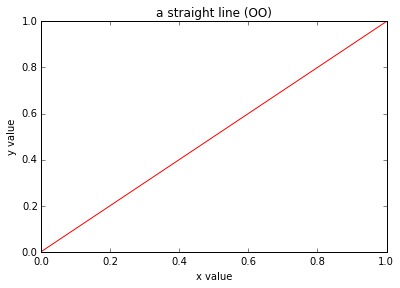

In [23]:
#面向对象的绘图过程
%matplotlib inline
import matplotlib
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

fig    = Figure()
#以上实例化 Figure, 得到一个figure对象

axes = matplotlib.axes.Axes(fig,[0.1, 0.1, 0.8, 0.8])
#以上实例化 Axes, 得到一个 axes 对象

ax = fig.add_axes(axes)
#以上添加 axes 对象到 fig 并命名为 ax.

line = matplotlib.lines.Line2D([0,1], [0,1])
#以上实例化 Line2D, 得到一个 line

line.set_color('r')
#以上调用 Line2D 对象的 set_* 方法设置属性

ax.add_line(line)
#以上将 Line2D 对象添加到 ax

ax.set_title("a straight line (OO)")
ax.set_xlabel("x value")
ax.set_ylabel("y value")
#以上完成基于 figure 的绘图逻辑

canvas = FigureCanvas(fig)
#以上实例化 FigureCanvasAgg, 同时传入参数 figure, 得到一个 canvase 对象，并让 canvas 完成图片的实际绘制。

fig
#输出图片

#canvas.print_figure('/Desktop/demo.pdf')
#保存图片

###4.查阅 Matplotlib 官网的[艺术体教程](http://matplotlib.org/users/artists.html?highlight=artist%20tutorial)，我们发现如下重要章节：

[Artist tutorial](http://matplotlib.org/users/artists.html?highlight=artist%20tutorial)

There are two types of Artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure). The standard use is to create a Figure instance, use the Figure to create one or more Axes or Subplot instances, and use the Axes instance helper methods to create the primitives...  

有两种 Atirsts :原始型和容器型。原始型代表我们想画到我们的画布上的标准图形对象：Line2D, Rectangle, Text, AxesImage, 等等，容器型（Axis, Axes, Figure）是放置他们的地方。_**标准手法是创建一个Figure实例，使用此 Figure 创建一个或多个 Axes/Subplot 实例， 再使用 Axes 实例的辅助方法去创建那些原始型（Line2D, Rectangle, Text, AxesImage..）**_。

The Axes is probably the most important class in the matplotlib API, and the one you will be working with most of the time. This is because the Axes is the plotting area into which most of the objects go, and the Axes has many special helper methods (plot(), text(), hist(), imshow()) to create the most common graphics primitives (Line2D, Text, Rectangle, Image, respectively). These helper methods will take your data (e.g., numpy arrays and strings) and create primitive Artist instances as needed (e.g., Line2D), add them to the relevant containers, and draw them when requested...  

Axes 或许是 matplotlib API 中最重要的类， 并且是你大部分时间工作的对象。因为 Axes 是大部分对象被描绘进去的空间，而且 Axes 有很多特别辅助方法（ plot(), text(), hist(), imshow() )去创建大部分图像原形（Line2D, Text, Rectangle, Image, 分别的)。这些辅助方法会导入你的数据（如，numpy 数组和字符串）并且按需求创建原始型的Artist实例（如,Line2D), 添加他们到相关容器，且根据需要绘制他们。

You should not add objects directly to the Axes.lines or Axes.patches lists unless you know exactly what you are doing, because the Axes needs to do a few things when it creates and adds an object. It sets the figure and axes property of the Artist, as well as the default Axes transformation (unless a transformation is set). It also inspects the data contained in the Artist to update the data structures controlling auto-scaling, so that the view limits can be adjusted to contain the plotted data. You can, nonetheless, create objects yourself and add them directly to the Axes using helper methods like add_line() and add_patch()...

你不应该直接添加对象到 Axes.lines 或者 Axes.patches 列表除非你确切知道你在做什么，因为 Axes 需要做一些事情当她创建并添加一个对象时。他设置那 Artist 的 figure 和 axes 属性，还有那默认 Axes 的 transformation (除非一个 transformation 已经设定了）。他也查看 Artist 包含的数据去升级那控制自动伸缩的数据结构，因此那视图限制可以被调整到包含那被绘制的数据。你可以，至少，自己创建对象并用辅助方法如 add_line()和 add_patch() 直接添加到 Axes.

###5.因此官方推荐的绘图过程是：

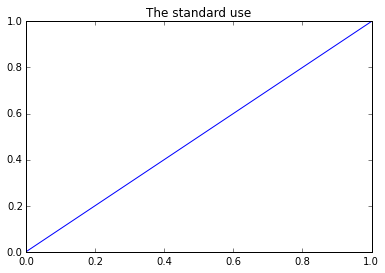

In [105]:
#混用过程与面向对象的简化绘图过程
import  matplotlib.pyplot as plt

fig    = plt.figure()
ax     = fig.add_axes([0.1, 0.1, 0.8, 0.8])
line,  = ax.plot([0,1], [0,1])
ax.set_title("The standard use")
fig.show()

这里，我们根据官方文档调用过程式函数 fig = plt.figure() 合并了两个过程（Figure 和 FigureCanvasAgg 的实例化过程），同时不再单独创建实例，而是调用 figure 和 axes 的辅助方法创建并自动添加图形对象。（用 fig.add_axes() 替代 matplotlib.axes.Axes()，用 ax.plot() 替代 matplotlib.lines.Line2D() )。大大简化了脚本，但是也请注意这里面省略的对象化步骤。


如果确实需要先创建对象，可以将参数传入类实例化之后，再添加到目标对象之中进行构图。如： 

x = ax.xaxis#获取 ax 对象 x 轴坐标  
xmajorLocator = matplotlib.ticker.MultipleLocator(0.1)#实例化刻度线,间隔0.1  
x.set_major_locator(xmajorLocator)#添加到目标对象之中

个人觉得如果混合方法没有按照设计意图正确绘图，可以使用面向对象的思维，一步一步绘制，同时参考文档，明白每一个步骤，如添加对象到 Axes 之后，需要手动调整坐标轴两极来适应数据范围：axes.autoscale_view()

然后再次绘图：
axes.figure.canvas.draw()

###6.对象归属关系图
根据如上的描述，我们可以试着画出 matplotlib 的构图对象逻辑关系。其中 yaxis 具有和 xaxis 一样的下级构图对象。  
####1.构图对象逻辑关系        

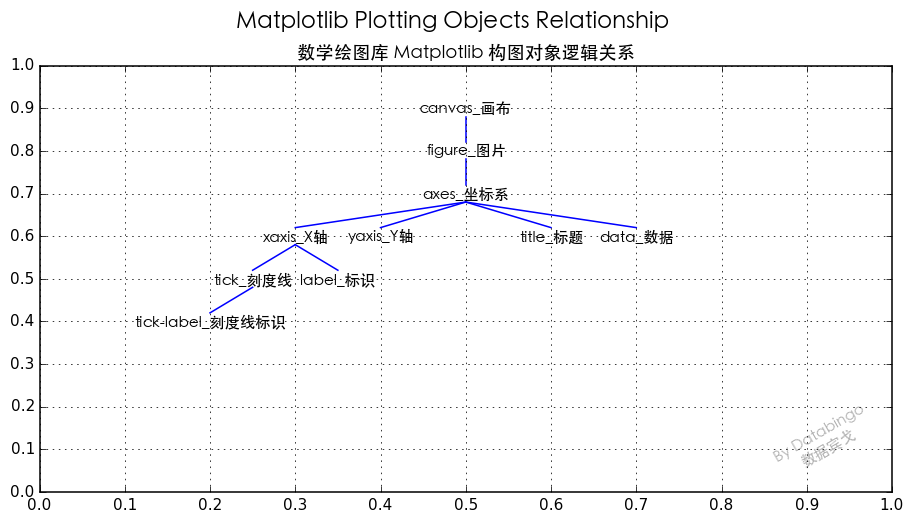

In [2]:
%matplotlib inline
# coding=utf8
from matplotlib import pyplot as plt

import sys  
reload(sys)  
sys.setdefaultencoding('utf-8')#设定默认编码适应中文  

import matplotlib
matplotlib.rcParams['savefig.dpi']=110#设定图片分辨率

from matplotlib import font_manager # 导入字体管理器
cfont = font_manager.FontProperties(fname='/Library/Fonts/华文黑体.ttf')#设定中文字体
#以上为通用导入设定

fig = plt.figure()
fig.set_size_inches(10, 5) # Set the figure size in inches (1in == 2.54cm)
fig.suptitle(u'Matplotlib Plotting Objects Relationship',x=0.5,y=1,fontproperties=cfont,size=15)#图片标题
#以上设定图片 figure

ax = fig.add_subplot(111)
ax.grid(True)#栅格
ax.set_title(u'数学绘图库 Matplotlib 构图对象逻辑关系',fontproperties=cfont,size=12)#坐标系标题
#以上设定坐标系 ax

x = ax.xaxis#获取 x 轴坐标
xmajorLocator = matplotlib.ticker.MultipleLocator(0.1)#坐标间隔0.1
x.set_major_locator(xmajorLocator)#加载定位器

y = ax.yaxis#获取 x 轴坐标
ymajorLocator = matplotlib.ticker.MultipleLocator(0.1)
y.set_major_locator(ymajorLocator)#加载定位器
#以上添加坐标系，设定坐标属性

ax.text(0.5,0.9,u'canvas_画布',horizontalalignment='center',verticalalignment='center',fontproperties=cfont)# horizontalalignment 以文本水平中线为对齐点放置在0.5位置。
ax.text(0.5,0.8,u'figure_图片',horizontalalignment='center',verticalalignment='center',fontproperties=cfont)
ax.text(0.5,0.7, u'axes_坐标系',horizontalalignment='center',verticalalignment='center',fontproperties=cfont)
ax.text(0.3,0.6, u'xaxis_X轴',horizontalalignment='center',verticalalignment='center',fontproperties=cfont)
ax.text(0.4,0.6,u'yaxis_Y轴',horizontalalignment='center',verticalalignment='center',fontproperties=cfont)
ax.text(0.6,0.6,u'title_标题',horizontalalignment='center',verticalalignment='center',fontproperties=cfont)
ax.text(0.7,0.6,u'data_数据',horizontalalignment='center',verticalalignment='center',fontproperties=cfont)
ax.text(0.25,0.5,u'tick_刻度线',horizontalalignment='center',verticalalignment='center',fontproperties=cfont)
ax.text(0.35,0.5,u'label_标识',horizontalalignment='center',verticalalignment='center',fontproperties=cfont)
ax.text(0.2,0.4,u'tick-label_刻度线标识',horizontalalignment='center',verticalalignment='center',fontproperties=cfont)
#以上添加文本 text

ax.add_line(matplotlib.lines.Line2D([0.5,0.5],[0.9-0.02,0.8+0.02]))
ax.add_line(matplotlib.lines.Line2D([0.5,0.5],[0.8-0.02,0.7+0.02]))
ax.add_line(matplotlib.lines.Line2D([0.5,0.4],[0.7-0.02,0.6+0.02]))
ax.add_line(matplotlib.lines.Line2D([0.5,0.3],[0.7-0.02,0.6+0.02]))
ax.add_line(matplotlib.lines.Line2D([0.5,0.6],[0.7-0.02,0.6+0.02]))
ax.add_line(matplotlib.lines.Line2D([0.5,0.7],[0.7-0.02,0.6+0.02]))
ax.add_line(matplotlib.lines.Line2D([0.3,0.25],[0.6-0.02,0.5+0.02]))
ax.add_line(matplotlib.lines.Line2D([0.3,0.35],[0.6-0.02,0.5+0.02]))
ax.add_line(matplotlib.lines.Line2D([0.25,0.2],[0.5-0.02,0.4+0.02]))
#以上添加线条 line

ax.text(0.92,0.12,u'By Databingo \n数据宾戈',horizontalalignment='center',verticalalignment='center',
        fontproperties=cfont, alpha=0.3,rotation=30)#签名

fig

####2.继承关系 

查看到 \__init\__.py  第40行：   
**defines the :class:~matplotlib.artist.Artist base class for all classes that draw things. **  
Artist 是所有绘制东西的类的基类。

再打开 artist.py 第72~73行：  
**Abstract base class for someone who renders into a FigureCanvas. **   
抽象基础类，可以进入 FigureCanvas 渲染的类的抽象超类。

原来 Artist 是一个抽象类。下有 Figure, Axes, Axis, Patch, Line2D, Rectangle, Text, AxesImage 等所有子类艺术体。

###7.到底是 axes 还是 figure  是最高的图形对象？ 


查看 \__init\__.py 第33~34行：   
**The axes module is the highest level of OO access to the library. **  
axes 模块是到本库的最高级的面向对象访问路径。

我们不是在 figure 实例创建之后，才添加的 axes 实例的吗？ 逻辑上 axes 在 figure 之后，为什么最高的图形对象不是 figure 呢?）

打开 figure.py 第一句话：  
**The figure module provides the top-level :class:~matplotlib.artist.Artist, the :class:Figure, which contains all the plot elements.**   
figure 模块提供顶级Artist类，也就是Figure类, 他可以包含所有绘图元素。


再看第 9~10 行：   
**:class:Figure top level container for all plot elements**   
Figure类：顶级容器，容纳所有绘图元素。

原来 Figure 类是顶级的 Artist 类不错，然而他是一个容器，用来容纳所有绘图元素，理论上 axes 也是一个绘图元素，因此 figure容纳 axes, 在构图对象逻辑关系上，figure 高于 axes.



###8.关于 Axes 和 Axis
图像坐标 Axes 将一张图的左下角视为原点，将图像的 x 方向和 y 方向总长度都看做1。x 方向的 0.2 就是指 20% 的 x 方向的总长，y 方向 0.8 的长度指 80% 的 y 方向总长。fig 的图像坐标称为 Figure 坐标，储存在为 fig.transFigure。每个 axes，比如 ax1，有属于自己的图像坐标。它以 ax1 绘图区域总长作为1，称为 Axes 坐标。也就是 ax1.transAxes。我们在使用 add_axes 时，传递的参数中，前两个元素为 axes 的左下角在 fig 的图像坐标上的位置，后两个元素指 axes 在 fig 的图像坐标上 x 方向和 y 方向的长度。如：

**ax3 = fig.add_axes([0.2,0.2,0.5,0.7]) # Add an axes at position rect [left, bottom, width, height]**  

根据参数绘图，多是由 Axes 对象的辅助方法完成的。查看plot()的源程序，可以看到plot()实际上会通过gca()获得当前的Axes对象ax，然后再调用它的plot()方法实现真正的绘图。

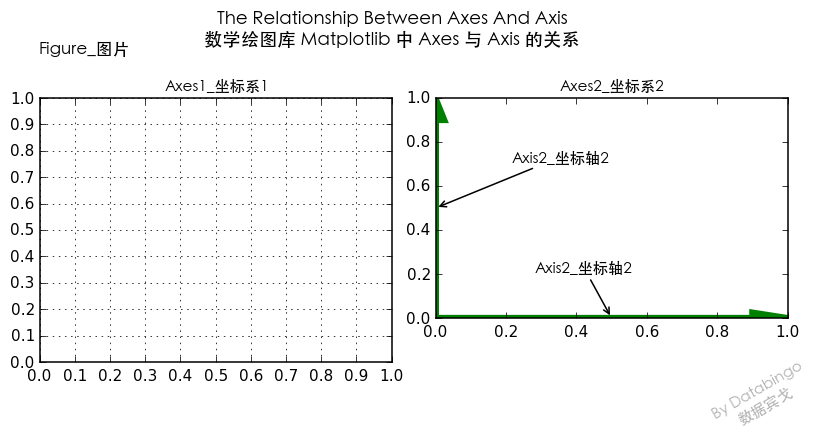

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

import sys  
reload(sys)  
sys.setdefaultencoding('utf-8')#设定默认编码适应中文  

import matplotlib
matplotlib.rcParams['savefig.dpi']=110#设定图片分辨率

from matplotlib import font_manager # 导入字体管理器
cfont = font_manager.FontProperties(fname='/Library/Fonts/华文黑体.ttf')#设定中文字体
#以上为通用导入设定

fig = plt.figure()
fig.set_size_inches(8, 4) # Set the figure size in inches (1in == 2.54cm)
fig.suptitle(u'The Relationship Between Axes And Axis\n数学绘图库 Matplotlib 中 Axes 与 Axis 的关系',x=0.5,y=1,fontproperties=cfont,size=12)#图片标题
#以上设定图片 figure

ax1 = fig.add_axes([0.1,0.2,0.4,0.6])
ax1.grid(True)#栅格
ax1.set_title(u'Axes1_坐标系1', fontproperties=cfont)

#以上设定坐标系 ax

x = ax1.xaxis#获取 x 轴坐标
xmajorLocator = matplotlib.ticker.MultipleLocator(0.1)#坐标间隔0.1
x.set_major_locator(xmajorLocator)#加载定位器

y = ax1.yaxis#获取 x 轴坐标
ymajorLocator = matplotlib.ticker.MultipleLocator(0.1)
y.set_major_locator(ymajorLocator)#加载定位器
#以上添加坐标系，设定坐标属性

#fig.set_facecolor('y')
ax2 = fig.add_axes([0.55,0.3,0.4,0.5])
ax2.set_title(u'Axes2_坐标系2', fontproperties=cfont)
ax2.add_line(matplotlib.lines.Line2D([0,1],[0.01,0.01],color='b',linewidth=2,zorder=1))
ax2.arrow(0, 0, 0.9, 0, linewidth=4, head_width=0.05, head_length=0.1, fc='g', ec='g', )
ax2.arrow(0,0, 0, 0.9, linewidth=4,head_width=0.05, head_length=0.1, fc='g', ec='g', )
ax2.annotate('Axis2_坐标轴2', xy=(0, 0.5),  xycoords='data',
                xytext=(50, 30), textcoords='offset points',
                arrowprops=dict(arrowstyle="->"),fontproperties=cfont,
                )

ax2.annotate('Axis2_坐标轴2', xy=(0.5, 0),  xycoords='data',
                xytext=(-50, 30), textcoords='offset points',
                arrowprops=dict(arrowstyle="->"),fontproperties=cfont,
                )

fig.text(0.92,0.12,u'By Databingo \n数据宾戈',horizontalalignment='center',verticalalignment='center',
        fontproperties=cfont, alpha=0.3,rotation=30)#签名

fig.text(0.1,0.9,u"Figure_图片",fontproperties=cfont,size=11)

fig

###9.在对象关系树上顺藤摸瓜
在OO绘图程序中，使用辅助方法plot(),text(), hist(), imshow()等，或而是使用 ax.set_* 的方法间接设置对象，使我们并没有真正看到title, tick, tick label, xaxis, yaxis，Line2D 等对象。但这些对象是真实存在的，你可以根据对象树顺藤摸瓜的找到他们，添加对象或者设置属性。比如，我们可以通过对象隶属关系找到 ylabel 并设置属性：  

fig.axes[0].yaxis.label.set_color('y')  
fig.axes[0].yaxis.label.set_rotation(10)  
fig.axes[0].yaxis.label.set_text('ylabel \n new line')  
fig.axes[0].yaxis.label.set_y(0.8) # Set y position  

###10.绘图辅助方法：数据与函数。
让我们来查看一下 Axes 类实例有多少内置的帮助函数可以进行绘图工作。

In [5]:
dir(matplotlib.axes.Axes)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getstate__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_legend_handles',
 '_init_axis',
 '_make_twin_axes',
 '_pcolorargs',
 '_process_unit_info',
 '_sci',
 '_set_artist_props',
 '_set_gc_clip',
 '_set_lim_and_transforms',
 '_shared_x_axes',
 '_shared_y_axes',
 '_update_line_limits',
 '_update_patch_limits',
 '_update_transScale',
 'acorr',
 'add_artist',
 'add_callback',
 'add_collection',
 'add_container',
 'add_image',
 'add_line',
 'add_patch',
 'add_table',
 'aname',
 'angle_spectrum',
 'annotate',
 'apply_aspect',
 'arrow',
 'autoscale',
 'autoscale_view',
 'axhline',
 'axhspan',
 'axis',
 'axvline',
 'axvspan',
 'bar',
 'barbs',
 'barh',
 'boxplot',
 'broken_barh',
 'bxp',
 'can_

###11.总结

\__init\__.py 第20~26行：   
**For the most part, direct use of the object-oriented library is encouraged when programming; pyplot is primarily for working interactively. The exceptions are the pyplot commands figure(), subplot(), subplots(), show(), and savefig(), which can greatly simplify scripting.**

大部分编程中，我们鼓励直接使用面向对象库；pyplot只是主要为了互动的工作。例外的几个 pyplot 命令 figure(), subplot(), subplots() 可以极大的简化脚本。

注1：
已有的以面向对象思想介绍 matplotlib 的文章：
1. [绘图: matplotlib核心剖析](http://www.cnblogs.com/vamei/archive/2013/01/30/2879700.html)   
2. [Getting Started With Matplotlib's OO Class Library](https://github.com/ericliang/matplotlib/blob/master/trunk/scipy06/oo_resources/leftwich_tut.txt)

注2：我用的是 Anaconda 科学处理包,它集成了很多有用的 python 库特别是basemap，独立安装，不会干扰系统原有的 python 版本。
